In [51]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#load the data
df = pd.read_excel('Cold and Flu Data.xlsx')
df.head()

,Item,ItemDesc,Group,Posting Year,Month No,Posting Month,Quantity,CostAmount,SalesAmount
0,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,3,March,4,1516.0,2380.00
1,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,4,April,4,1516.0,2350.25
2,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,5,May,8,3032.0,4641.00
3,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,6,June,8,3032.0,4730.25
4,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,7,July,6,2274.0,3510.50


In [53]:
#create a Date column
df['Date'] = pd.to_datetime(df['Posting Year'].astype(str)+ '-' + df['Month No'].astype(str) + '-1', errors='coerce')
df.head()

,Item,ItemDesc,Group,Posting Year,Month No,Posting Month,Quantity,CostAmount,SalesAmount,Date
0,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,3,March,4,1516.0,2380.00,2022-03-01
1,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,4,April,4,1516.0,2350.25,2022-04-01
2,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,5,May,8,3032.0,4641.00,2022-05-01
3,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,6,June,8,3032.0,4730.25,2022-06-01
4,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,7,July,6,2274.0,3510.50,2022-07-01


In [54]:
#aggregate the data according to the date
df2 = df.groupby('Date')['Quantity'].sum().reset_index()
print(df2)

         Date  Quantity
0  2022-01-01       575
1  2022-02-01       390
2  2022-03-01       614
3  2022-04-01       539
4  2022-05-01       772
5  2022-06-01      1039
6  2022-07-01       706
7  2022-08-01       462
8  2022-09-01       527
9  2022-10-01       770
10 2022-11-01       664
11 2022-12-01      1084
12 2023-01-01       573
13 2023-02-01       443
14 2023-03-01       647
15 2023-04-01       640
16 2023-05-01       600
17 2023-06-01       611
18 2023-07-01       633
19 2023-08-01       577
20 2023-09-01       606
21 2023-10-01       574
22 2023-11-01       259


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      23 non-null     datetime64[ns]
 1   Quantity  23 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 500.0 bytes


<Figure size 1600x900 with 0 Axes>

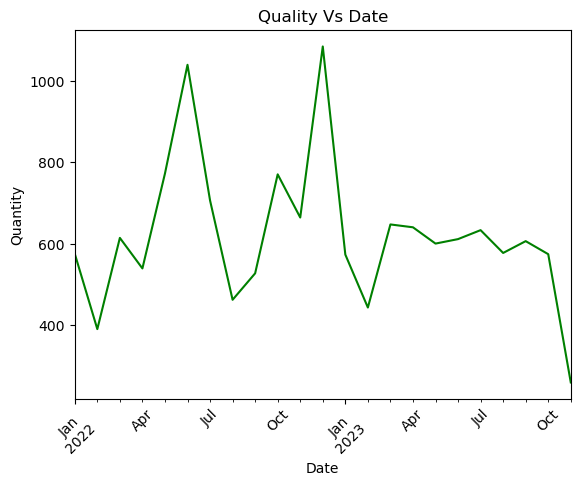

In [56]:
#plot Quality against Date
plt.figure(figsize=(16, 9))
df2.plot(x = 'Date', y = 'Quantity', kind = 'line', rot = 45, legend = False, color = 'green')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quality Vs Date')
plt.show()

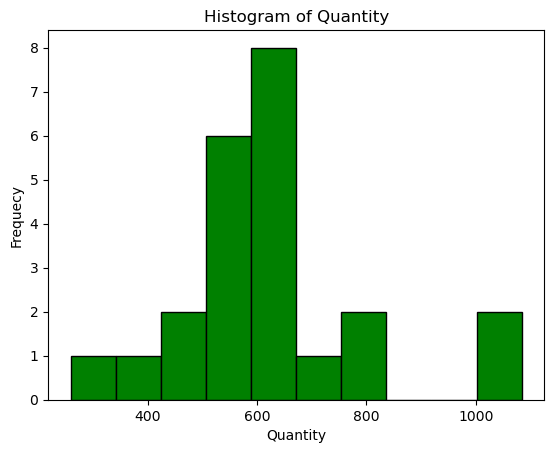

In [57]:
#check on the distribution using a Histogram
plt.hist(df2['Quantity'], bins = 10, color = 'green', edgecolor = 'black')
plt.xlabel('Quantity')
plt.ylabel('Frequecy')
plt.title('Histogram of Quantity')
plt.show()

In [58]:
from statsmodels.tsa.stattools import adfuller

In [59]:
#check stationarity of the data
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', 'No of lags used', 'No of observations used']
    for value, label in zip(results, labels):
        print(label +' : '+ str(value))
    if results[1] <= 0.05:
        print("It is stationary")
    else:
        print("It is not stationary")

In [60]:
adfuller_test(df2['Quantity'])

ADF test statistic : -3.290853334159304
p-value : 0.015292314309405482
No of lags used : 0
No of observations used : 22
It is stationary


# AUTO REGRESSIVE MODEL

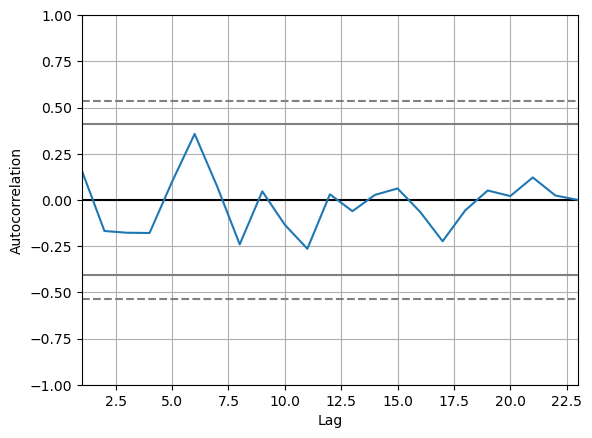

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Quantity'])
plt.show()

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

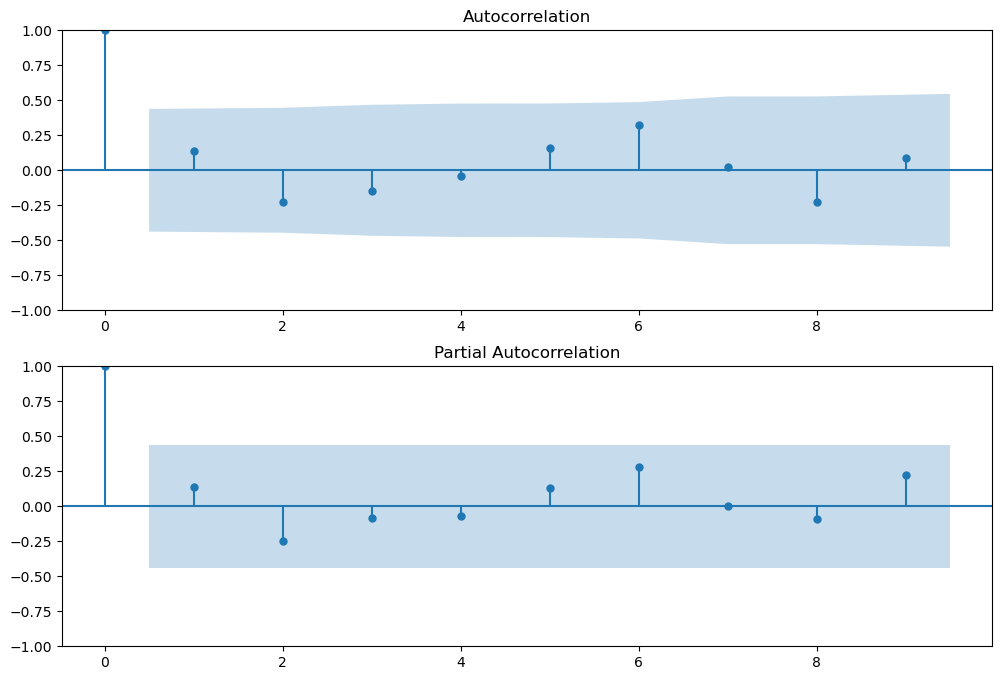

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['Quantity'].iloc[3:], lags= 9, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Quantity'].iloc[3:], lags= 9, ax = ax2)

In [67]:
from statsmodels.tsa.arima.model import ARIMA

In [68]:
model = ARIMA(df2['Quantity'], order=(1,0,1))
model_fit = model.fit()

C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   23
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -150.871
Date:                Thu, 23 Nov 2023   AIC                            309.741
Time:                        12:38:39   BIC                            314.283
Sample:                    01-01-2022   HQIC                           310.883
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        621.2724     48.929     12.697      0.000     525.374     717.171
ar.L1         -0.3599      1.962     -0.183      0.854      -4.206       3.486
ma.L1          0.6046      1.603      0.377      0.706      -2.537       3.747
sigma2      2.904e+04   7855.367      3.697      0.000    1.36e+04    4.44e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.99   Prob(JB):                         0.06
Heteroskedasticity (H):               0.51   Skew:                             0.92
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

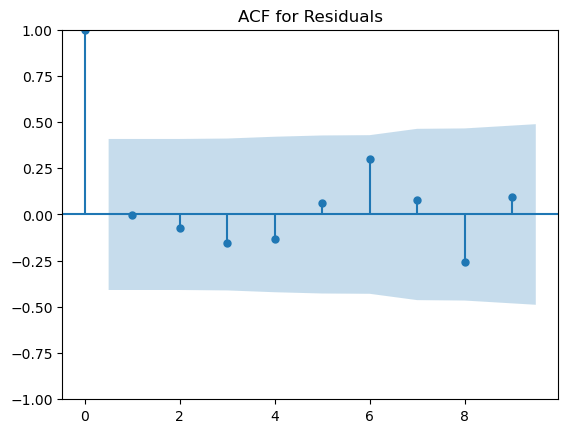

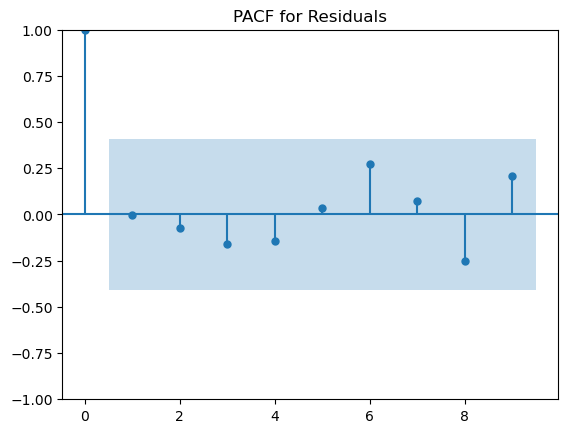

In [75]:
residuals = model_fit.resid

# Create ACF plot
plot_acf(residuals, lags=9, alpha=0.05)
plt.title('ACF for Residuals')
plt.show()

# Create PACF plot
plot_pacf(residuals, lags=9, alpha=0.05)
plt.title('PACF for Residuals')
plt.show()